# MLSP Homework 1

## Problem 1

We are given with five samples [92, 95.8, 91.3, 94.1, 90.9]

Here, we assume a underlying uniform distribution and the probability density function for the distribution is given as $$\mathscr{L}(a,b) = \prod_{i=1}^{n}f(x_i;a,b)  = \prod_{i=1}^{n}\frac{1}{b-a} = \frac{1}{(b-a)^n}$$

Here our goal is to find the parameters a and b that maximizes the likelihood of observing the five data samples.

We know that, $$a <= min(X_1,X_2,.....X_n)$$ $$b >= max(X_1,X_2,.......X_n)$$

Taking log on both sides of the likelihood function,
$$\log\mathscr{L}(a,b) = \log\prod_{i=1}^{n}f(x_i;a,b)  = \log\prod_{i=1}^{n}\frac{1}{b-a} = log((b-a)^{-n}) = -n * log(b-a)$$

Partially derivating the function with respect to a and b,

$$\frac{\partial }{\partial a} log \mathscr{L}(a,b) = \frac{n}{b-a}$$
$$\frac{\partial }{\partial b} log \mathscr{L}(a,b) = -\frac{n}{b-a}$$
where n is the number of samples, which is 5 in this case.

We can see that the function is monotonically increasing and decreasing for a and b respectively. We also know that the distribution is bounded between 90.9 and 95.8. 90.9 being the lowest value and 95.8 being the highest value. Therefore,

$$\hat{a}_{MLE} = 90.9$$
$$\hat{b}_{MLE} = 95.8$$

As Prof. K uses rounded up values in integer multiples of 5, the boundaries for A+ should be multiples of 5. In our five data samples the lowest score getting an A+ is 90.9 and the highest score getting an A+ is 95.8. Keeping these numbers in mind we can conclude Prof. K will give an **A+ to students who have their grades in between 90 and 100**.

## Problem 2

In [673]:
import os
import cv2
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

### Loading all image files

In [674]:
dir_path = 'M:/Spring 2020/MLSP/HW1/data'

In [675]:
luddy1 = cv2.imread(os.path.join(dir_path, 'luddy1.jpeg'))
luddy2 = cv2.imread(os.path.join(dir_path, 'luddy2.jpeg'))
luddy3 = cv2.imread(os.path.join(dir_path, 'luddy3.jpeg'))

In [676]:
print(luddy1.shape, luddy2.shape, luddy3.shape)

(768, 1024, 3) (768, 1024, 3) (768, 1024, 3)


##### Flattening all image matrices

In [677]:
luddy1 = np.ravel(luddy1)
luddy1 = luddy1.reshape(luddy1.shape[0], 1)

luddy2 = np.ravel(luddy2)
luddy2 = luddy2.reshape(luddy2.shape[0], 1)

luddy3 = np.ravel(luddy3)
luddy3 = luddy3.reshape(luddy3.shape[0], 1)

print(luddy1.shape, luddy2.shape, luddy3.shape)

(2359296, 1) (2359296, 1) (2359296, 1)


In [678]:
luddy1 = luddy1 - np.mean(luddy1)
luddy1 = luddy1 * (1/np.std(luddy1))

luddy2 = luddy2 - np.mean(luddy2)
luddy2 = luddy2 * (1/np.std(luddy2))

luddy3 = luddy3 - np.mean(luddy3)
luddy3 = luddy3 * (1/np.std(luddy3))

#### Plotting histogram of all images

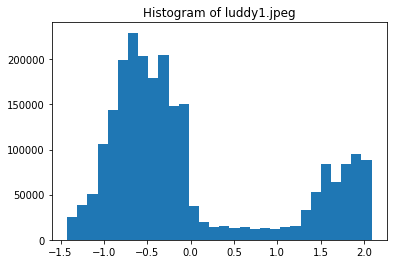

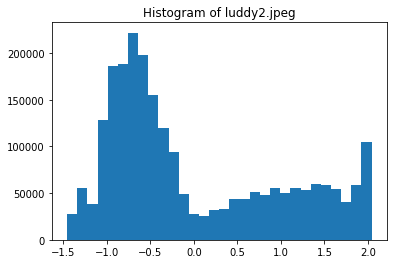

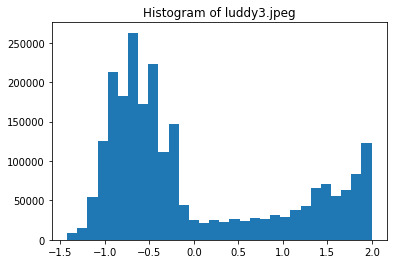

In [679]:
plt.hist(luddy1, bins = 30)
plt.title("Histogram of luddy1.jpeg")
plt.show()
plt.hist(luddy2, bins = 30)
plt.title("Histogram of luddy2.jpeg")
plt.show()
plt.hist(luddy3, bins = 30)
plt.title("Histogram of luddy3.jpeg")
plt.show()

According to Central Limit Theorum, the sum of random variables gets closer to a gaussian distribution. In our scenario, the random variables are the scenes. In a perfect picture with no blur or shakes, there will be less number of scenes and in a shaken picture there will be more number of scenes increasing the number of scenes i.e. random variables in the distribution.

With these, we can say that a good picture will be less gaussian like and blurry picture will be more gaussian like. Inferring from the above histograms, we can say that the **luddy1.jpeg has less random variables**. 

Although all the histograms show that the images follow a multimodal distribution, we can say that the the histogram of ***luddy1.jpeg is less gaussian like***.

#### Calculating kurtosis value for all three images

In [680]:
luddy1_kurtosis = np.mean(luddy1 ** 4) - 3.0
luddy2_kurtosis = np.mean(luddy2 ** 4) - 3.0
luddy3_kurtosis = np.mean(luddy3 ** 4) - 3.0

In [681]:
print('The kurtosis value of luddy1.jpeg: ' + str(luddy1_kurtosis))
print('The kurtosis value of luddy2.jpeg: ' + str(luddy2_kurtosis))
print('The kurtosis value of luddy3.jpeg: ' + str(luddy3_kurtosis))

The kurtosis value of luddy1.jpeg: -0.5594396228432177
The kurtosis value of luddy2.jpeg: -0.9183061116484663
The kurtosis value of luddy3.jpeg: -0.8406916696674518


The ***most sharpest image is luddy1.jpeg*** with a ***kurtosis value of -0.559*** and the distribution being **the least gaussian like** in the given pictures.

The ***most shaken image is luddy2.jpeg*** with a ***kurtosis value of -0.918*** and the distribution being **the most gaussian like** in the given pictures.

## Problem 3

In [682]:
X = io.loadmat(os.path.join(dir_path, 'X.mat'))

In [683]:
print(X.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [684]:
X = X['X']

#### Scatter plot of the data

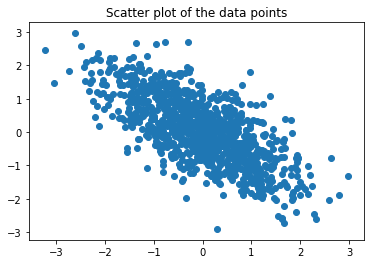

In [686]:
plt.scatter(X[0], X[1])
plt.title('Scatter plot of the data points')
plt.show()

#### Initialise and normalize a random vector

In [687]:
rand_vec = np.random.normal(size = (1,2))
rand_vec = (rand_vec[0])

Normalizing the vector

In [688]:
rand_vec = rand_vec / np.sqrt((rand_vec[0]**2 + rand_vec[1]**2))
print(rand_vec)

[-0.98114046 -0.19329612]


Calculating L2 norm using library and manually to check results

In [689]:
print(np.linalg.norm(rand_vec))
print(np.sqrt(np.sum(rand_vec**2)))

1.0
1.0


We see that the randomly initialized vector is a unit vector as it's L2 norm is 1

In [690]:
#print(rand_vec.shape, X.shape)

In [691]:
#z = np.dot(rand_vec.T, X)
#print(z.shape)

In [692]:
#lambda_ = np.dot(z, z.T)
#print(lambda_)

In [693]:
#print(np.dotnp.dot(X, X.T).shape)
#print(rand_vec.shape)

In [694]:
#lambda_diff = 2 * np.dot(rand_vec, np.dot(X, X.T))

In [695]:
#print(lambda_diff)

In [696]:
w = rand_vec
print(w)

[-0.98114046 -0.19329612]


#### Gradient ascent for eigen decomposition

In [697]:
def eigen_decomp(X, w):
    max_epochs = 1000
    epoch = 0
    alpha = 0.01
    
    while epoch<=max_epochs:
        lambda_diff = 2 * np.dot(np.dot(X, X.T), w)
        w = w +(alpha * lambda_diff)
        w = w/np.sqrt(np.sum(w**2))
        epoch += 1
        
    return lambda_diff, w

In [698]:
eigen_value1, w = eigen_decomp(X, w)

In [699]:
print('The first eigen vector is: ' + str(w))

The first eigen vector is: [-0.70593278  0.70827884]


In [700]:
largest_eigen_value = np.dot(X, X.T)
largest_eigen_value = np.dot(w.T, largest_eigen_value)
largest_eigen_value = np.dot(largest_eigen_value, w)
print('The largest eigen value is: ' + str(largest_eigen_value))

The largest eigen value is: 1658.5883302531925


Calculating 's', 'u' and the contribution of the first eigen vector

In [703]:
def su(w, X):
    s1 = np.sqrt(np.sum(np.dot(w.T,X)**2))
    u1 = np.dot(X.T, w)/s1
    contrib = np.dot(s1,u1.T)
    w, contrib = w.reshape(-1,1), contrib.reshape(-1,1)
    contrib = np.dot(w, contrib.T)
    return s1, u1, contrib

In [704]:
s1, u1, contrib = su(w, X)

Removing the contribution of the first eigen vector from the original matrix

In [705]:
newX = X - contrib
print(newX.shape)

(2, 1000)


Plotting the new data matrix along with the eigen vector

C:\Users\vjkri\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


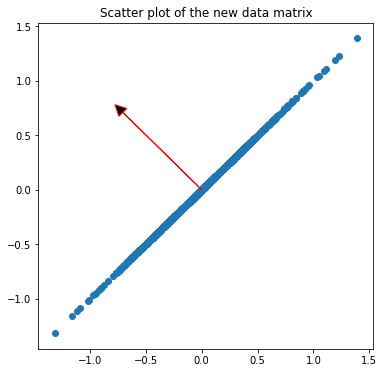

In [719]:
plt.figure(figsize = (6,6))
plt.scatter(newX[0], newX[1])
ax = plt.axes()
ax.arrow(0,0,w[0],w[1],head_width = 0.1, head_length = 0.1,fc = 'k', ec= 'r')
plt.title('Scatter plot of the new data matrix')
plt.show()

From the above plot we can see that the new data matrix doesnot have any variation along the direction of the first eigen vector.

Finding the second eigen vector

In [720]:
w2 = np.random.normal(size = (1,2))[0]
w2 = w2/np.sqrt(np.sum(w2**2))
print(w2)

[0.29631482 0.95509032]


In [721]:
eigen_value2, w2 = eigen_decomp(newX, w2)
print('The second eigen vector is: ' + str(w2))

The second eigen vector is: [0.70827884 0.70593278]


**Plotting the data points with the two eigen vectors**

C:\Users\vjkri\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


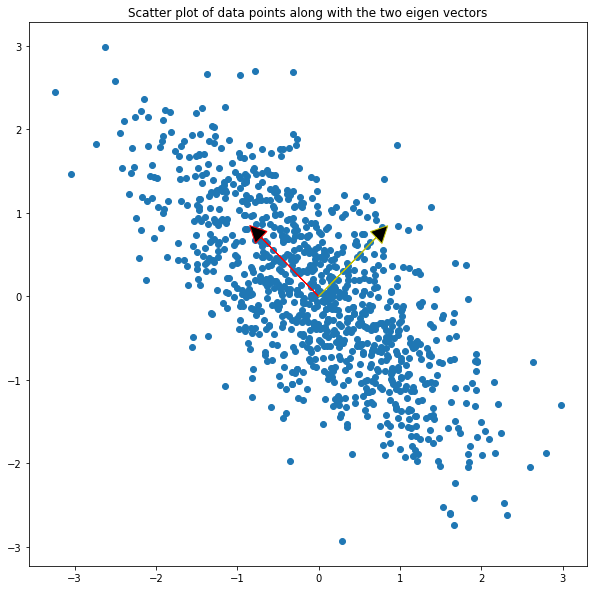

In [722]:
plt.figure(figsize = (10,10))
plt.scatter(X[0], X[1])
ax = plt.axes()
ax.arrow(0,0,w[0],w[1],head_width = 0.2, head_length = 0.2,fc = 'k', ec= 'r')
ax.arrow(0,0,w2[0],w2[1],head_width = 0.2, head_length = 0.2,fc = 'k', ec= 'y')
plt.title('Scatter plot of data points along with the two eigen vectors')
plt.show()

From the plot above, we can see that the two eigen vectors are orthonormal to each other.

### Problem 4

In [610]:
flute = io.loadmat(os.path.join(dir_path, 'flute.mat'))
flute = flute['X']
print('The shape of data matrix is: ' + str(flute.shape))

The shape of data matrix is: (128, 143)


Colormap of the flute music

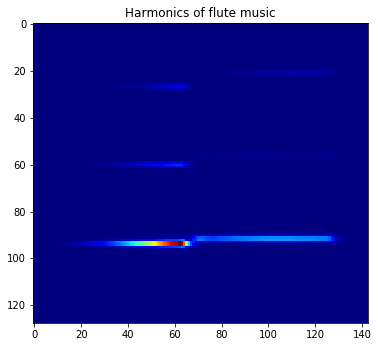

In [611]:
plt.figure(figsize = (6,12))
plt.title('Harmonics of flute music')
plt.imshow(flute, cmap = 'jet', interpolation = None)
plt.show()

In [726]:
from IPython.display import Audio
import librosa as lb
Audio(lb.istft(flute), rate = 4000)

In [613]:
weight1 = np.random.normal(size = 128)
weight1 = weight1/np.sqrt(np.sum(weight1**2))
weight1 = weight1.reshape(-1,1)

Gradient ascent to find the first eigen vector

In [614]:
eig_val1, weight1 = eigen_decomp(flute, weight1)

In [622]:
print('The first eigen vector shape is: ' + str(weight1.shape))

The first eigen vector shape is: (128, 1)


Removing the first eigen vector's contribution from the original data matrix

In [627]:
sflute, uflute, contribflute = su(weight1, flute)
newflute = flute - contribflute

Finding the second eigen vector

In [628]:
weight2 = np.random.normal(size = 128)
weight2 = weight2/np.sqrt(np.sum(weight2**2))
weight2 = weight2.reshape(-1,1)

In [629]:
eig_val2, weight2 = eigen_decomp(flute, weight2)

Plotting the eigen vectors

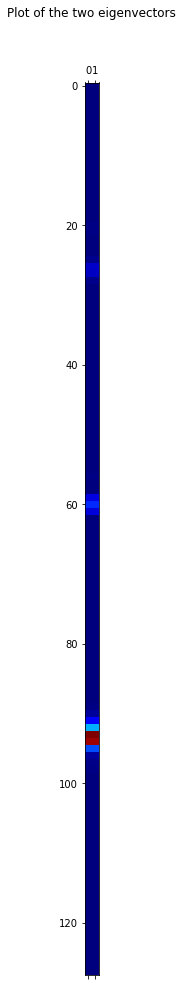

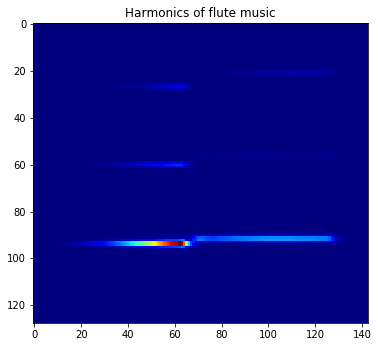

In [641]:
#Concatenate the eigen vectors to plot
concat_vec = np.concatenate((weight1.reshape(-1,1), weight2.reshape(-1,1)),axis=1)
plt.matshow(concat_vec, cmap = 'jet', interpolation = None)
plt.grid(False)
plt.title("Plot of the two eigenvectors\n")
plt.show()

plt.figure(figsize = (6,12))
plt.title('Harmonics of flute music')
plt.imshow(flute, cmap = 'jet', interpolation = None)
plt.show()

Calculating the temporal activation and plotting it

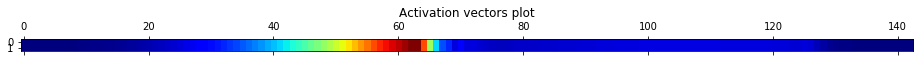

In [644]:
#calculating temporal activation
temp_activation = np.dot(concat_vec.T,flute)

plt.matshow(temp_activation,cmap = 'jet', interpolation = None)
plt.grid(False)
plt.title("Activation vectors plot\n")
plt.show()

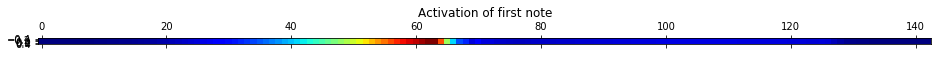

In [647]:
first_tem_act = temp_activation[:1]
plt.matshow(first_tem_act,cmap = 'jet', interpolation = None)
plt.title('Activation of first note\n')
plt.show()

**Recovering the notes**

In [669]:
def note_recover(eigen_vector1, eigen_vector2, temp_activation, num_note):
    temp_1st = np.dot(eigen_vector1, temp_activation)
    plt.matshow(temp_1st, cmap = 'jet')
    plt.title("Plot of the recovered " + num_note + "\n")

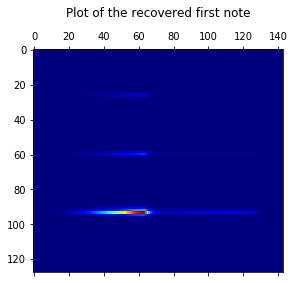

In [670]:
note_recover(weight1, weight2, first_tem_act, 'first note')

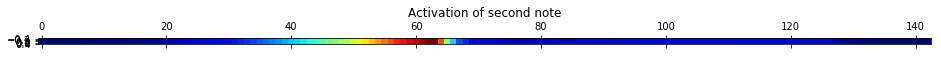

In [671]:
second_tem_act = temp_activation[1:2]
plt.matshow(second_tem_act,cmap = 'jet', interpolation = None)
plt.title('Activation of second note\n')
plt.show()

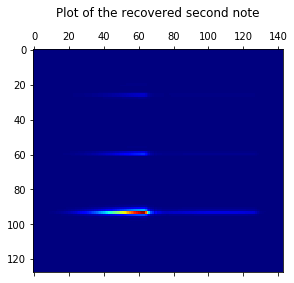

In [672]:
note_recover(weight1, weight2, second_tem_act, 'second note')